In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#io와 pandas 모듈 import
import io
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from scipy import interpolate
from matplotlib import dates
import tensorflow as tf 
from tensorflow import data
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, MaxPooling1D, Flatten, Bidirectional, Conv2D
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
weather_train = '/content/drive/MyDrive/seoul_airquality_pm25.csv'

#pandas read_csv로 불러오기
data = pd.read_csv(weather_train)
data.head()

,dt,pm10,pm2.5,co
0,2015-01-03:01,38.0,21.0,0.3
1,2015-01-03:02,29.0,21.0,0.3
2,2015-01-03:03,35.0,21.0,0.3
3,2015-01-03:04,31.0,22.0,0.3
4,2015-01-03:05,34.0,26.0,0.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61320 entries, 0 to 61319
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      61320 non-null  object 
 1   pm10    59388 non-null  float64
 2   pm2.5   59738 non-null  float64
 3   co      59886 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB


In [ ]:
data.isnull().sum()

dt          0
pm10     1932
pm2.5    1582
co       1434
dtype: int64

In [ ]:
data.interpolate( method = 'linear', inplace = True)

In [ ]:
data.isnull().sum()

dt       0
pm10     0
pm2.5    0
co       0
dtype: int64

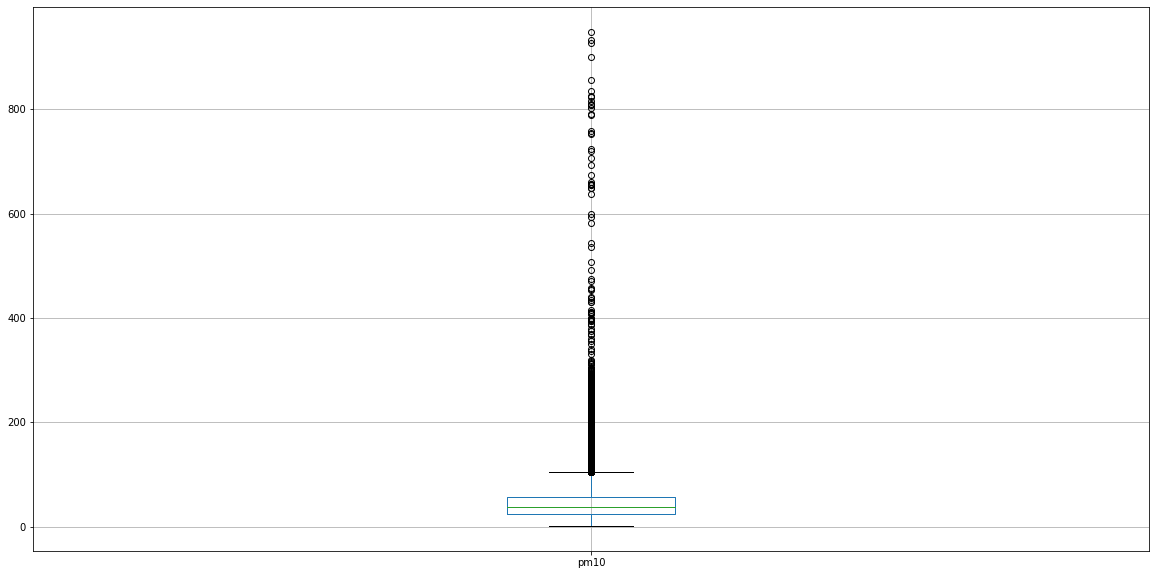

In [ ]:
data.boxplot(column=['pm10'],figsize=(20,10))

#이상치 제거하기

In [ ]:
q3 = data.quantile(0.99) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = data.quantile(0.0)

iqr = q3 - q1

print("q1 \n",q1)
print("q3 \n",q3)
print("iqr \n",iqr)

q1 
 pm10     1.0
pm2.5    1.0
co       0.1
Name: 0.0, dtype: float64
q3 
 pm10     151.0
pm2.5     83.0
co         1.3
Name: 0.99, dtype: float64
iqr 
 pm10     150.0
pm2.5     82.0
co         1.2
dtype: float64


In [ ]:
def is_pm10_outlier(data):
    pm10_score = data['pm10']
    if pm10_score > q3['pm10'] + 1.5 * iqr['pm10'] or pm10_score < q1['pm10'] - 1.5 * iqr['pm10']:
      pm10_score = None
      return pm10_score
    else:
      return pm10_score

def is_pm25_outlier(data):
    pm25_score = data['pm2.5']
    if pm25_score > q3['pm2.5'] + 1.5 * iqr['pm2.5'] or pm25_score < q1['pm2.5'] - 1.5 * iqr['pm2.5']:
      pm25_score = None
      return pm25_score
    else:
      return pm25_score

"""def is_o3_outlier(data):
    o3_score = data['o3']
    if o3_score > q3['o3'] + 1.5 * iqr['o3'] or o3_score < q1['o3'] - 1.5 * iqr['o3']:
      o3_score = None
      return o3_score
    else:
      return o3_score

def is_no2_outlier(data):
    no2_score = data['no2']
    if no2_score > q3['no2'] + 1.5 * iqr['no2'] or no2_score < q1['no2'] - 1.5 * iqr['no2']:
      no2_score = None
      return no2_score
    else:
      return no2_score"""

def is_co_outlier(data):
    co_score = data['co']
    if co_score > q3['co'] + 1.5 * iqr['co'] or co_score < q1['co'] - 1.5 * iqr['co']:
      co_score = None
      return co_score
    else:
      return co_score

"""def is_so2_outlier(data):
    so2_score = data['so2']
    if so2_score > q3['so2'] + 1.5 * iqr['so2'] or so2_score < q1['so2'] - 1.5 * iqr['so2']:
      so2_score = None
      return so2_score
    else:
      return so2_score"""

"def is_so2_outlier(data):\n    so2_score = data['so2']\n    if so2_score > q3['so2'] + 1.5 * iqr['so2'] or so2_score < q1['so2'] - 1.5 * iqr['so2']:\n      so2_score = None\n      return so2_score\n    else:\n      return so2_score"

In [ ]:
data['pm10'] = data.apply(is_pm10_outlier,axis = 1)
data['pm2.5'] = data.apply(is_pm25_outlier,axis = 1)
#data['o3'] = data.apply(is_o3_outlier,axis = 1)
#data['no2'] = data.apply(is_no2_outlier, axis = 1)
data['co'] = data.apply(is_co_outlier, axis = 1)
#data['so2'] = data.apply(is_so2_outlier, axis = 1)

data.head()

,dt,pm10,pm2.5,co
0,2015-01-03:01,38.0,21.0,0.3
1,2015-01-03:02,29.0,21.0,0.3
2,2015-01-03:03,35.0,21.0,0.3
3,2015-01-03:04,31.0,22.0,0.3
4,2015-01-03:05,34.0,26.0,0.5


In [ ]:
data.isnull().sum()

dt        0
pm10     63
pm2.5     4
co        0
dtype: int64

In [ ]:
data.interpolate( method = 'linear', inplace = True)

In [ ]:
data.isnull().sum()

dt       0
pm10     0
pm2.5    0
co       0
dtype: int64

In [ ]:
data.to_csv('/content/drive/MyDrive/processedData.csv')

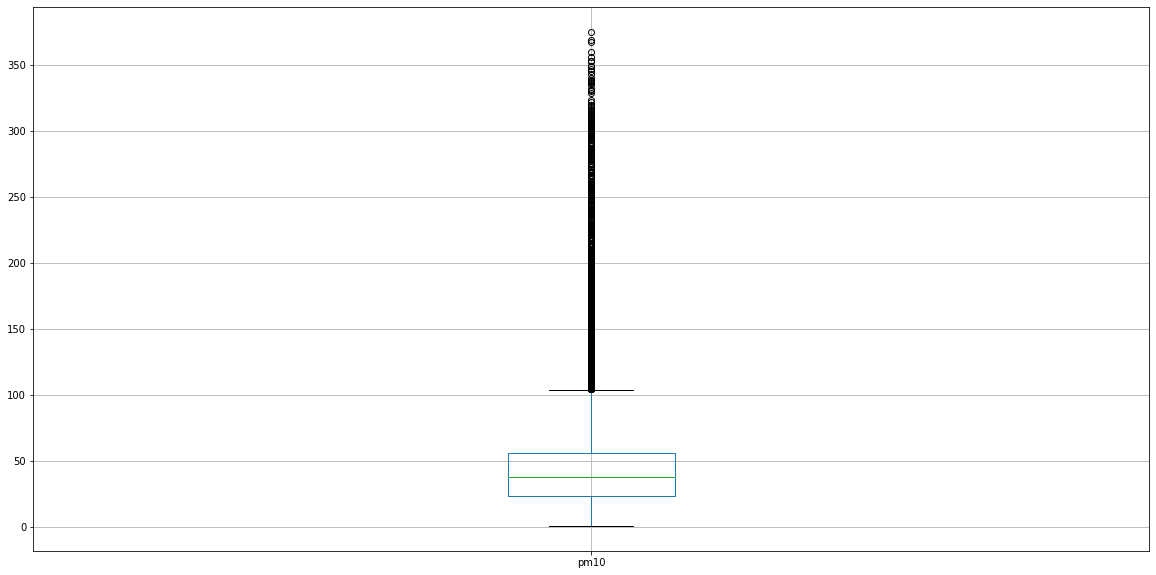

In [ ]:
data.boxplot(column=['pm10'],figsize=(20,10))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61320 entries, 0 to 61319
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      61320 non-null  object 
 1   pm10    61320 non-null  float64
 2   pm2.5   61320 non-null  float64
 3   co      61320 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB


In [ ]:
#시간별 미세먼지 농도 변화 확인
from datetime import datetime

data['dt'] = data['dt'].apply(str)
data['hour'] = data['dt'].str[11:13]
data = data.drop('dt', axis=1)

data.hour.head(24)

0     01
1     02
2     03
3     04
4     05
5     06
6     07
7     08
8     09
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
Name: hour, dtype: object

In [ ]:
hour_data = data.groupby('hour', as_index=False).agg({'co':'mean', 'pm10':'mean', 'pm2.5':'mean'})
hour_data

,hour,co,pm10,pm2.5
0,01,0.487736,44.479596,24.491146
1,02,0.476619,43.556278,25.633682
2,03,0.466873,43.275420,24.881202
3,04,0.461177,41.231954,23.983581
4,05,0.466792,41.468103,23.694670
5,06,0.483918,40.446946,23.168047
6,07,0.511141,41.762665,23.068300
7,08,0.540102,42.156094,22.638775
8,09,0.540314,44.843071,22.869720
9,10,0.510983,45.083276,22.880221


<Figure size 1440x1080 with 0 Axes>

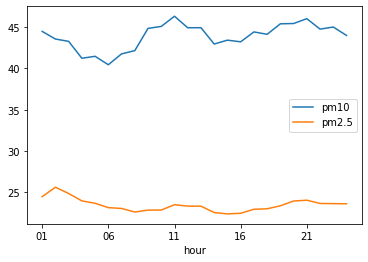

In [ ]:
# 미세먼지 농도변화 Hour
plt.figure(figsize=(20,15))
hour_data.plot(x='hour', y=['pm10', 'pm2.5'])
plt.show()

In [ ]:
Y = data[["pm10"]]
# 전체 열 이름 입력하기
Y.columns = ['PM10']

In [ ]:
pm10_mean = data[["pm10"]].mean()
pm10_std = data[["pm10"]].std()
pm25_mean = data[["pm2.5"]].mean()
pm25_std = data[["pm2.5"]].std()
co_mean = data[["co"]].mean()
co_std = data[["co"]].std()

In [ ]:
pm10_mean

pm10    43.883407
dtype: float64

In [ ]:
pm10_std

pm10    30.883249
dtype: float64

In [ ]:
pm25_mean

pm2.5    23.474103
dtype: float64

In [ ]:
pm25_std

pm2.5    16.988391
dtype: float64

In [ ]:
co_mean

co    0.465331
dtype: float64

In [ ]:
co_std

co    0.235374
dtype: float64

In [ ]:
"""minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(data)
data = pd.DataFrame(minmax_scaled_data)"""

'minmax_scaler = MinMaxScaler()\nminmax_scaled_data = minmax_scaler.fit_transform(data)\ndata = pd.DataFrame(minmax_scaled_data)'

In [ ]:
from sklearn.preprocessing import StandardScaler
from pickle import dump
#st_scaler = StandardScaler()
#st_scaler.fit(data)
#Z_normalization = st_scaler.transform(data)
data = pd.DataFrame(Z_normalization)
dump(st_scaler, open('/st_scaler.pkl', 'wb'))

print(data)

              0         1         2         3
0     -0.190506 -0.145636 -0.702424 -1.661325
1     -0.481929 -0.145636 -0.702424 -1.516862
2     -0.287647 -0.145636 -0.702424 -1.372399
3     -0.417168 -0.086772 -0.702424 -1.227936
4     -0.320027  0.148685  0.147294 -1.083473
...         ...       ...       ...       ...
61315 -0.449549 -0.793142 -0.277565  1.083473
61316 -0.417168 -0.734278 -0.277565  1.227936
61317 -0.579070 -0.852007  0.147294  1.372399
61318 -0.514309 -0.852007 -0.277565  1.516862
61319 -0.708591 -0.969735 -0.277565  1.661325

[61320 rows x 4 columns]


In [ ]:
data.columns = ["pm10","pm2.5","co","hour"]
data

,pm10,pm2.5,co,hour
0,-0.190506,-0.145636,-0.702424,-1.661325
1,-0.481929,-0.145636,-0.702424,-1.516862
2,-0.287647,-0.145636,-0.702424,-1.372399
3,-0.417168,-0.086772,-0.702424,-1.227936
4,-0.320027,0.148685,0.147294,-1.083473
...,...,...,...,...
61315,-0.449549,-0.793142,-0.277565,1.083473
61316,-0.417168,-0.734278,-0.277565,1.227936
61317,-0.579070,-0.852007,0.147294,1.372399
61318,-0.514309,-0.852007,-0.277565,1.516862


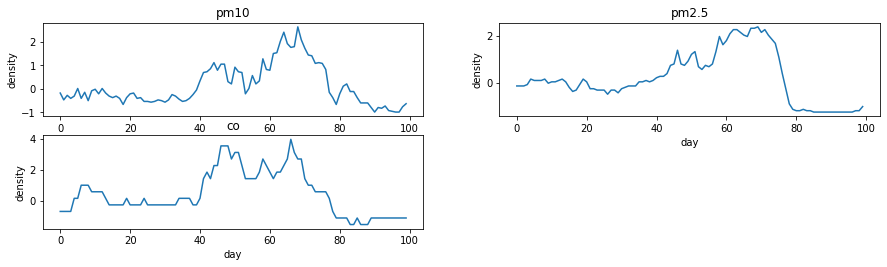

In [ ]:
# 데이터 시각화
plt.figure(figsize=(15, 10))

for i in range(0, 3):
    y = data.iloc[:, i]
    plt.subplot(5, 2, i+1)
    plt.title(y.name)
    plt.xlabel('day')
    plt.ylabel('density')
    plt.plot(y[:100])
    
# O3, !NO2 와 관계가 있음!

In [ ]:
corr_matrix = data.corr()
# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.
corr_matrix["pm10"].sort_values(ascending=False)

pm10     1.000000
pm2.5    0.824153
co       0.484748
hour     0.026230
Name: pm10, dtype: float64

In [ ]:
x = data[["pm10","pm2.5","co"]]
#data = pd.concat([x,Y], axis=1)
#print(data)


#x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, shuffle = False, random_state = 0)

In [ ]:
data = pd.concat([x,Y], axis=1)
print(data)

           pm10     pm2.5        co  PM10
0     -0.190506 -0.145636 -0.702424  38.0
1     -0.481929 -0.145636 -0.702424  29.0
2     -0.287647 -0.145636 -0.702424  35.0
3     -0.417168 -0.086772 -0.702424  31.0
4     -0.320027  0.148685  0.147294  34.0
...         ...       ...       ...   ...
61315 -0.449549 -0.793142 -0.277565  30.0
61316 -0.417168 -0.734278 -0.277565  31.0
61317 -0.579070 -0.852007  0.147294  26.0
61318 -0.514309 -0.852007 -0.277565  28.0
61319 -0.708591 -0.969735 -0.277565  22.0

[61320 rows x 4 columns]


In [ ]:
prec_data = x[:24]
prec_data

,pm10,pm2.5,co
0,-0.190506,-0.145636,-0.702424
1,-0.481929,-0.145636,-0.702424
2,-0.287647,-0.145636,-0.702424
3,-0.417168,-0.086772,-0.702424
4,-0.320027,0.148685,0.147294
5,0.003775,0.089821,0.147294
6,-0.417168,0.089821,0.997013
7,-0.158126,0.089821,0.997013
8,-0.514309,0.148685,0.997013
9,-0.093366,-0.027908,0.572154


In [ ]:
prec_data.to_csv('/content/drive/MyDrive/precData.csv')

In [ ]:
"""data["pm10"] = data["pm10"].apply(lambda _: str(_))
data["pm2.5"] = data["pm2.5"].apply(lambda _: str(_))
data["co"] = data["co"].apply(lambda _: str(_))
data["PM10"] = data["PM10"].apply(lambda _: str(_))
data.info()"""

'data["pm10"] = data["pm10"].apply(lambda _: str(_))\ndata["pm2.5"] = data["pm2.5"].apply(lambda _: str(_))\ndata["co"] = data["co"].apply(lambda _: str(_))\ndata["PM10"] = data["PM10"].apply(lambda _: str(_))\ndata.info()'

In [ ]:
"""def ts_train_test(all_data, time_steps, for_periods): 
    
    input:
     data: 날짜를 인덱스로 가지는 주식가격(Adj Close) 데이터
    output:
     X_train, y_train: 데이터의 70퍼
     X_test : 데이터의 30퍼 
    time_steps: # input 데이터의 time steps
    for_periods: # output 데이터의 time steps
    
    # training & test set 만들기
    ts_train = all_data[:42923].values
    ts_valid = all_data[42924:52121].values
    ts_test = all_data[52122:].values
    ts_train_len = len(ts_train)
    ts_valid_len = len(ts_valid)
    ts_test_len = len(ts_test)
    
    # training 데이터의 samples 와 time steps로 원본데이터 슬라이싱하기
    X_train = [] 
    y_train = [] 
    y_train_stacked = [] 
    for i in range(time_steps, ts_train_len - 1):
        X_train.append(ts_train[i-time_steps:i,0:2])
        y_train.append(ts_train[i:i+for_periods,3:4])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # 3차원으로 재구성하기
    # np.reshape(samples, time steps, features) 로 만듦
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

    # 검증 데이터의 samples 와 time steps로 원본데이터 슬라이싱하기
    X_valid = [] 
    y_valid = [] 
    y_valid_stacked = [] 
    for i in range(time_steps, ts_valid_len - 1):
        X_valid.append(ts_valid[i-time_steps:i,0])
        y_valid.append(ts_valid[i:i+for_periods,0])
    X_valid, y_valid = np.array(X_valid), np.array(y_valid)
    
    # 3차원으로 재구성하기
    # np.reshape(samples, time steps, features) 로 만듦
    X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1],1))
    
    # Preparing to creat X_test 
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    
    X_test = []
    for i in range(time_steps, ts_test_len+ time_steps- for_periods):
        X_test.append(inputs[i-time_steps:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
    
    return X_train, y_train, X_valid, y_valid, X_test"""

In [ ]:
"""X_train, y_train, X_valid, y_valid, X_test = ts_train_test(data,24,1)

# 3차원의 X_train을 데이터프레임 형식으로 바꿔서 눈으로 확인해보기
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis = 1)

# 3차원의 X_test를 데이터프레임 형식으로 바꿔서 눈으로 확인해보기
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)



print("There are " + str(X_train.shape[0]) + " samples in the training data")
# There are 1505 samples in the training data

print("There are " + str(X_test.shape[0]) + " samples in the test data")
# There are 249 samples in the test data"""

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61320 entries, 0 to 61319
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    61320 non-null  float64
 1   pm2.5   61320 non-null  float64
 2   co      61320 non-null  float64
 3   hour    61320 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


In [ ]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(WINDOW_SIZE, shift=1,stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))

    ds_y = tf.data.Dataset.from_tensor_slices(y[WINDOW_SIZE:])
    ds = tf.data.Dataset.zip((ds_x,ds_y))
    if shuffle:
      ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=6
BATCH_SIZE=128

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,Y, train_size=0.7, shuffle=False, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=False, random_state=0)

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(X_train, y_train, WINDOW_SIZE, BATCH_SIZE, False)
val_data = windowed_dataset(X_valid, y_valid, WINDOW_SIZE, BATCH_SIZE, False)
test_data = windowed_dataset(X_test, y_test,WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
for x, y in train_data.take(1):
  print(f'데이터셋x 샘플: {x}')
  print(f'데이터셋y 샘플: {y}')

데이터셋x 샘플: [[[-0.19050634 -0.14563612 -0.70242445]
  [-0.48192884 -0.14563612 -0.70242445]
  [-0.28764717 -0.14563612 -0.70242445]
  [-0.41716828 -0.08677191 -0.70242445]
  [-0.32002745  0.14868492  0.14729428]
  [ 0.00377532  0.08982071  0.14729428]]

 [[-0.48192884 -0.14563612 -0.70242445]
  [-0.28764717 -0.14563612 -0.70242445]
  [-0.41716828 -0.08677191 -0.70242445]
  [-0.32002745  0.14868492  0.14729428]
  [ 0.00377532  0.08982071  0.14729428]
  [-0.41716828  0.08982071  0.99701301]]

 [[-0.28764717 -0.14563612 -0.70242445]
  [-0.41716828 -0.08677191 -0.70242445]
  [-0.32002745  0.14868492  0.14729428]
  [ 0.00377532  0.08982071  0.14729428]
  [-0.41716828  0.08982071  0.99701301]
  [-0.15812606  0.08982071  0.99701301]]

 ...

 [[-0.35240773 -0.26336453 -0.27756509]
  [-0.15812606  0.03095651  0.14729428]
  [ 0.00377532  0.14868492  0.57215364]
  [ 0.29519782  0.38414175  0.57215364]
  [ 0.35995837  0.61959858  0.99701301]
  [ 0.47328934  0.50187017 -0.27756509]]

 [[-0.15812606  

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')


데이터셋(X) 구성(batch_size, window_size, feature갯수): (128, 6, 3)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (128, 1)


In [ ]:
from keras.layers import Dropout
from keras.layers import Bidirectional
#LSTM
model_lstm = Sequential([
    Bidirectional(LSTM(units = 6, return_sequences = True, activation = 'tanh', input_shape=[WINDOW_SIZE, 3])),
    Dropout(0.5),
    Bidirectional(LSTM(units = 6, activation = 'tanh')),
    Dense(1)
])

In [ ]:
#CNN
model_cnn = Sequential([
    # 1차원 feature map 생성
    Conv2D(filters=32, kernel_size=(2, 1),
 #          padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 3,1]),
    #MaxPooling1D(pool_size=3),
    Flatten(),
    #Dense(100, activation="relu"),
    Dense(3, activation="relu"),
    Dense(3, activation="relu"),
    Dense(1)
])

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 3, 32)          96        
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1443      
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,555
Trainable params: 1,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

loss= tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error")
opt = tf.keras.optimizers.Nadam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
#model_lstm.compile(loss=loss, optimizer=opt, metrics=['MSE'])
model_cnn.compile(loss=loss, optimizer=opt, metrics=['MSE'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
# val_loss 기준 체크포인터도 생성합니다.

filename3 = os.path.join('./', 'ckeckpointer_lstm.ckpt')
checkpoint_lstm = ModelCheckpoint(filename3, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

filename2 = os.path.join('./', 'ckeckpointer_cnn.ckpt')
checkpoint_cnn = ModelCheckpoint(filename2, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history2 = model_cnn.fit(train_data, 
                    validation_data=(val_data), 
                    epochs=200,
                    callbacks=[checkpoint_cnn, earlystopping])

Epoch 1/200
    332/Unknown - 6s 13ms/step - loss: 45.9203 - MSE: 3057.1443
Epoch 1: val_loss improved from inf to 38.69420, saving model to ./ckeckpointer_cnn.ckpt
336/336 [==============================] - 7s 18ms/step - loss: 45.8859 - MSE: 3051.1719 - val_loss: 38.6942 - val_MSE: 2114.9478
Epoch 2/200
335/336 [============================>.] - ETA: 0s - loss: 45.4581 - MSE: 3013.7986
Epoch 2: val_loss improved from 38.69420 to 37.94286, saving model to ./ckeckpointer_cnn.ckpt
336/336 [==============================] - 5s 15ms/step - loss: 45.4506 - MSE: 3012.5037 - val_loss: 37.9429 - val_MSE: 2062.6375
Epoch 3/200
332/336 [============================>.] - ETA: 0s - loss: 44.1537 - MSE: 2904.2332
Epoch 3: val_loss improved from 37.94286 to 35.90168, saving model to ./ckeckpointer_cnn.ckpt
336/336 [==============================] - 5s 15ms/step - loss: 44.1104 - MSE: 2897.6252 - val_loss: 35.9017 - val_MSE: 1921.0864
Epoch 4/200
331/336 [============================>.] - ETA: 0s - 

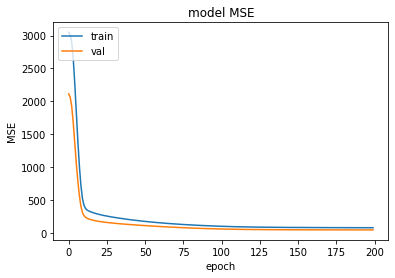

In [ ]:
plt.plot(history2.history['MSE'])
plt.plot(history2.history['val_MSE'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

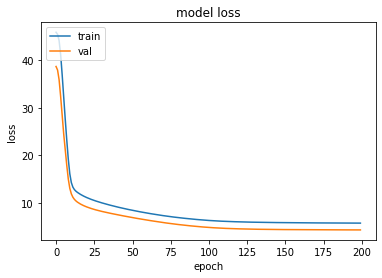

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.load_weights('./ckeckpointer_cnn.ckpt')
y_test_pred = model_cnn.predict(test_data)

72/72 [==============================] - 1s 12ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#mse_train = mean_squared_error(y_train, y_train_pred)
#mse_test = mean_squared_error(y_test, y_train_pred)
mse_test = mean_squared_error(np.asarray(y_test)[6:], y_test_pred)

#print("y1 MSE:%.4f" % mean_squared_error(y_test_pred[24:,0], y_test_pred[24:,0]))
#print("y2 MSE:%.4f" % mean_squared_error(y_test_pred[24:,1], y_test_pred[24:,1]))
print('MSE - 테스트 데이터 : % .2f' %(mse_test))

MSE - 테스트 데이터 :  64.86


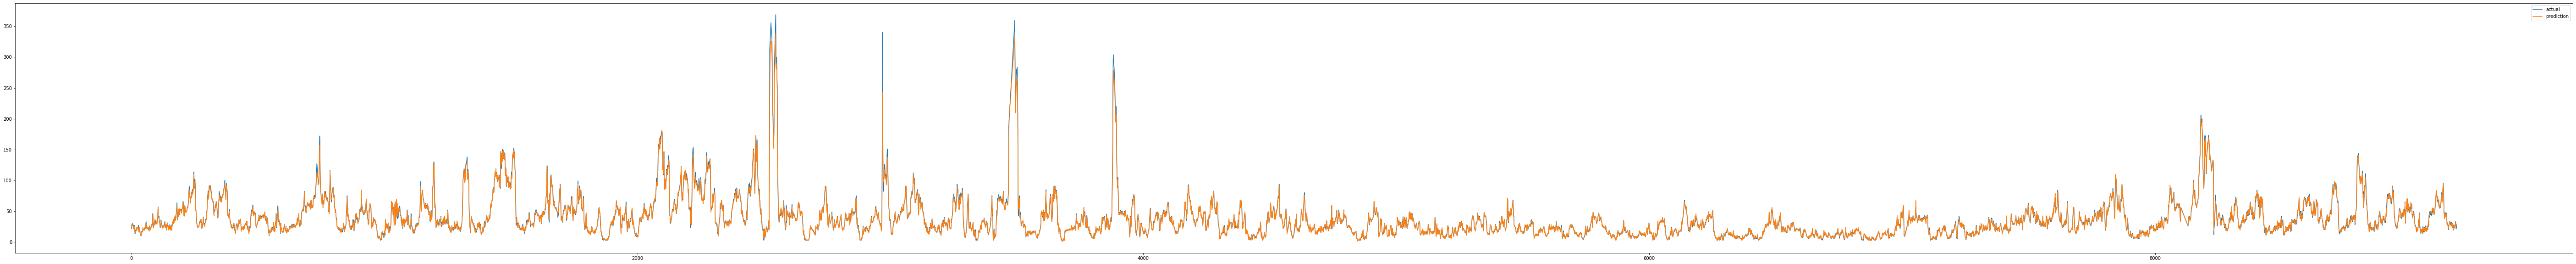

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(np.asarray(y_test)[5:], label='actual')
plt.plot(y_test_pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
model_cnn.save("PM10_cnn")

In [ ]:
"""converter = tf.lite.TFLiteConverter.from_saved_model("PM10_cnn")
converter._experimental_lower_tensor_list_ops = False
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()"""

'converter = tf.lite.TFLiteConverter.from_saved_model("PM10_cnn")\nconverter._experimental_lower_tensor_list_ops = False\nconverter.experimental_new_converter = True\nconverter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\nconverter.optimizations = [tf.lite.Optimize.DEFAULT]\nconverter.target_spec.supported_types = [tf.float16]\ntflite_quant_model = converter.convert()'

In [ ]:
# uint 8 양자화
# saved_model_dir = '/content/PM10_uint16'
def representative_data_gen():
  for image in tf.data.Dataset.from_tensor_slices(X_train).batch(1).take(100):
    yield [image]
converter = tf.lite.TFLiteConverter.from_saved_model("PM10_cnn")
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.uint8]
tflite_quant_model = converter.convert()

In [ ]:
# 모델 저장
open("model_PM10.tflite", "wb").write(tflite_quant_model)

8896

In [ ]:
!apt-get update && apt-get -qq install xxd
!xxd -i model_PM10.tflite > PM10_cnn_test.h

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 2s (106 kB/s)
Reading package lis